<a href="https://colab.research.google.com/github/dayanidhi116/MACHINE-LEARNING/blob/main/DBSCAN(Density%20Based%20spatial%20clustering%20of%20application%20with%20noise)%20and%20HDNSCAN(Hierarchical%20Density%20Based%20spatial%20clustering%20of%20application%20with%20noise)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Confusion Matrix: DBSCAN Noise vs Fraud
[[275177   9138]
 [   128    364]]

Confusion Matrix: HDBSCAN Noise vs Fraud
[[ 73887 210428]
 [   138    354]]


<ipython-input-1-1330a886fdc7>:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-1-1330a886fdc7>:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


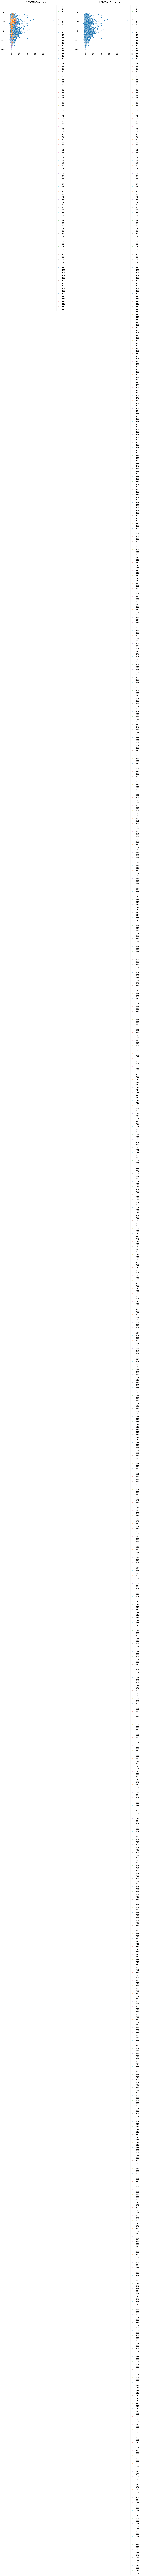

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df = pd.read_csv(url)

# Preprocess
X = df.drop('Class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction (optional but helps clustering)
X_pca = PCA(n_components=10).fit_transform(X_scaled)

# ---------------- DBSCAN ----------------
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_pca)

# ---------------- HDBSCAN ----------------
hdb = hdbscan.HDBSCAN(min_cluster_size=15)
hdb_labels = hdb.fit_predict(X_pca)

# Add labels to DataFrame
df['DBSCAN'] = db_labels
df['HDBSCAN'] = hdb_labels

# ---------------- Compare Noise Detection ----------------
# DBSCAN noise points = -1
dbscan_noise_pred = (df['DBSCAN'] == -1).astype(int)
hdbscan_noise_pred = (df['HDBSCAN'] == -1).astype(int)
true_fraud = df['Class']

print("Confusion Matrix: DBSCAN Noise vs Fraud")
print(confusion_matrix(true_fraud, dbscan_noise_pred))

print("\nConfusion Matrix: HDBSCAN Noise vs Fraud")
print(confusion_matrix(true_fraud, hdbscan_noise_pred))

# ---------------- Visualization ----------------
X_2d = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=db_labels, palette='tab10', s=10)
plt.title("DBSCAN Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=hdb_labels, palette='tab10', s=10)
plt.title("HDBSCAN Clustering")

plt.tight_layout()
plt.show()
